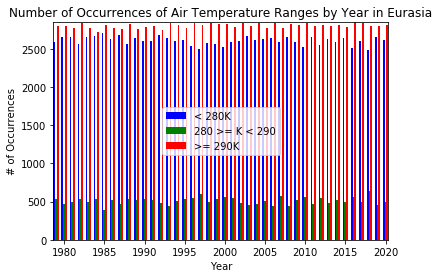

In [2]:
import os
import matplotlib.pylab as plt
from matplotlib import cm
import matplotlib.image as mpimg
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, glob

directory = "C:/Users/kwjan/Downloads/Air2M"
air_all = np.zeros((42, 94, 192))
lat_all = np.zeros((42, 94))
lon_all = np.zeros((42, 192))
i = 0

for file in os.listdir(directory):
    air2m = Dataset('C:/Users/kwjan/Downloads/Air2M/' + str(file))
    air = air2m.variables['air'][0, :, :].reshape(94, 192)
    lat = air2m.variables['lat'][:]
    lon = air2m.variables['lon'][:]
    air_all[i, :, :] = air
    lat_all[i, :] = lat
    lon_all[i, :] = lon
    i += 1

latmask = np.logical_and(lat >= -30, lat <= 85)
lonmask = np.logical_and(lon >= 0, lon <= 180)
lat_all = lat_all[:, latmask]
lon_all = lon_all[:, lonmask]
air_all = air_all[:, latmask, :]
air_all = air_all[:, :, lonmask]
air_count = np.zeros((42, 3))
for i in range(42):
    air_count[i, :] = [sum(sum(air_all[i, :, :] < 280)), sum(sum(np.logical_and(air_all[i, :, :] >= 280,
                                                                                air_all[i, :, :] < 290))),
                       sum(sum(air_all[i, :, :] >= 290))]
years = np.arange(1979, 2021)
ax = plt.subplot(111)
w = 0.225
ax.bar(years - w, air_count[:, 0], width=w, color='b', align='center', label='< 280K')
ax.bar(years, air_count[:, 1], width=w, color='g', align='center', label='280 >= K < 290')
ax.bar(years + w, air_count[:, 2], width=w, color='r', align='center', label='>= 290K')
ax.autoscale(tight=True)
plt.legend(loc='center')
lowmean = np.mean(air_count[:, 0])
medmean = np.mean(air_count[:, 1])
highmean = np.mean(air_count[:, 2])
plt.xlabel('Year')
plt.ylabel('# of Occurrences')
plt.title('Number of Occurrences of Air Temperature Ranges by Year in Eurasia')
plt.savefig('AirTempOccurrences_Eurasia.jpeg', quality=95, dpi=720, orientation='landscape')
plt.show()

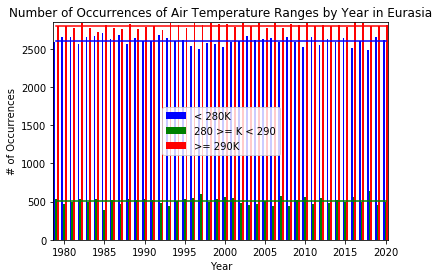

In [7]:
years = np.arange(1979, 2021)
ax = plt.subplot(111)
w = 0.225
ax.bar(years - w, air_count[:, 0], width=w, color='b', align='center', label='< 280K')
ax.bar(years, air_count[:, 1], width=w, color='g', align='center', label='280 >= K < 290')
ax.bar(years + w, air_count[:, 2], width=w, color='r', align='center', label='>= 290K')
ax.autoscale(tight=True)
plt.legend(loc='center')
lowmean = np.mean(air_count[:, 0])
medmean = np.mean(air_count[:, 1])
highmean = np.mean(air_count[:, 2])
plt.xlabel('Year')
plt.ylabel('# of Occurrences')
plt.title('Number of Occurrences of Air Temperature Ranges by Year in Eurasia')
plt.plot(years, np.full((42,), lowmean), color='b', linewidth=1.5)
plt.plot(years, np.full((42,), medmean), color='g', linewidth=1.5)
plt.plot(years, np.full((42,), highmean), color='r', linewidth=1.5)
plt.savefig('AirTempOccurrences_Eurasia_MeanLines.jpeg', quality=95, dpi=720, orientation='landscape')
plt.show()
print('The straight lines represent the mean number of occurances for each temperature range.')

In [26]:
lowabove = years[air_count[:, 0] > lowmean]
medabove = years[air_count[:, 1] > medmean]
highabove = years[air_count[:, 2] > highmean]
print(str(sum(lowabove >= 0)) + ' qualifying years, ', str(sum(lowabove >= 1999)) + ' years past 1999, ',
      str(round(sum(lowabove >= 1999) / sum(lowabove >= 0) * 100, 1)) + '% past 1999 out of qualifying years, ',
      str(round(sum(lowabove >= 1999) / 42 * 100, 1)) + '% total')
print(str(sum(medabove >= 0)) + ' qualifying years, ', str(sum(medabove >= 1999)) + ' years past 1999, ',
      str(round(sum(medabove >= 1999) / sum(medabove >= 0) * 100, 1)) + '% past 1999 out of qualifying years, ',
      str(round(sum(medabove >= 1999) / 42 * 100, 1)) + '% total')
print(str(sum(highabove >= 0)) + ' qualifying years, ', str(sum(highabove >= 1999)) + ' years past 1999, ',
      str(round(sum(highabove >= 1999) / sum(highabove >= 0) * 100, 1)) + '% past 1999 out of qualifying years, ',
      str(round(sum(highabove >= 1999) / 42 * 100, 1)) + '% total')

print('\nThe first row describes low temperatures represented by the blue lines in the graph above.\nThe second is the medium temperatures corresponding to the green, and the third row is the red, high temperatures.\nTo determine "qualifying years", I filtered for years that have a greater number of occurances of a certain temperature than \nthe mean number of occurances. ')
print('\nIt can be observed that in the last 21 years, there has been an increase in the occurances \nof higher temperatures.')

21 qualifying years,  10 years past 1999,  47.6% past 1999 out of qualifying years,  23.8% total
23 qualifying years,  11 years past 1999,  47.8% past 1999 out of qualifying years,  26.2% total
22 qualifying years,  13 years past 1999,  59.1% past 1999 out of qualifying years,  31.0% total

The first row describes low temperatures represented by the blue lines in the graph above.
The second is the medium temperatures corresponding to the green, and the third row is the red, high temperatures.
To determine "qualifying years", I filtered for years that have a greater number of occurances of a certain temperature than 
the mean number of occurances. 

It can be observed that in the last 21 years, there has been an increase in the occurances 
of higher temperatures.


In [27]:
Year = 1979
for i in range(42):
    plt.figure(figsize=(10, 5))
    txtstring = "Air Temperature in Eurasia \n at 2m Elevation, " + str(Year + i) + "\n"
    ax = plt.axes(projection=ccrs.Mercator())
    ax.coastlines(resolution='50m')
    ax.set_extent([0, 180, -30, 80], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(levels=[1], scale='coarse', facecolor="grey"))
    image = ax.contourf(lon_all[i, :], lat_all[i, :], air_all[i, :, :], transform=ccrs.PlateCarree(),
                        levels=np.linspace(275, 300, 51), extend='both')
    cb = plt.colorbar(image, orientation='horizontal', pad=0.08, shrink=0.65)
    cb.ax.tick_params(labelsize=10)
    cb.set_label('Temperature (K)', size=18)
    gl = ax.gridlines(draw_labels=True)
    plt.title(txtstring)
    plt.savefig('C:/Users/kwjan/Downloads/Air2M Pics/' + str(Year + i) + '.png')
    plt.close()

import cv2

img_array = []
for filename in glob('C:/Users/kwjan/Downloads/Air2M Pics/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

out = cv2.VideoWriter('Air2mVidEurasia.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 2.5, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

print('Creating the .mp4 file')


Creating the .mp4 file


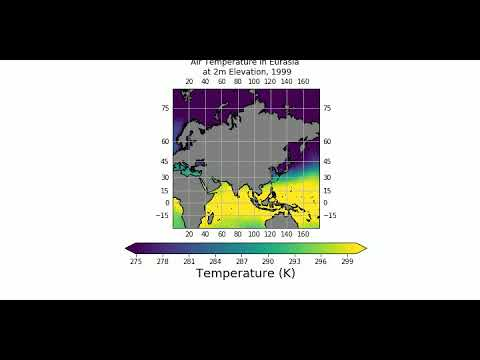

In [40]:
from IPython.display import YouTubeVideo

YouTubeVideo('xjaP9KQCjMQ', width=700, height=700)

